<h1 style="color:Blue" align="center"> AtliQo Bank Credit Card Launch </h1>

<h3 style="color:Red">Business Problem:</h3>

AtliQo Bank is a new bank in India and is getting ready to launch its <b>first credit card</b>. Since the credit card market is already very competitive, the bank wants to <b>stand out by targeting the right group of customers</b>.

To do this, they plan to use <b>past data</b> about customers, their transactions, and credit profiles. This data will help the bank make smart, data-based decisions.

The main goal is to <b>find the best type of customers</b>—those who have good financial habits and are likely to use the credit card responsibly. The bank wants to understand things like:
<ul>
  <li>How much people earn</li>
  <li>Their credit scores</li>
  <li>Their spending patterns</li>
  <li>How they use their money</li>
</ul>

By analyzing all this, AtliQo Bank wants to design a <b>customized credit card</b> that meets the needs of those ideal customers and also matches the bank's goals for <b>low risk and high profit</b>.


<h3 style="color:Green">Project Objective:</h3>

<p>The goal of this project is to <b>identify a group of high-potential customers</b> who are best suited for the launch of a new credit card. This will be done by analyzing their <b>demographics</b>, <b>spending habits</b>, and <b>credit attributes</b> using a structured, two-phase approach.</p>

<h4 style="color:DarkSlateBlue">Phase 1: Data-Driven Target Market Identification</h4>

<ul>
  <li><b>Data Cleaning:</b> Fixing missing or incorrect values in the dataset</li>
  <li><b>Distribution Analysis:</b> Checking if the financial data is normally distributed or skewed</li>
  <li><b>Exploratory Data Analysis (EDA):</b> Understanding customer behavior and financial patterns</li>
  <li><b>Outlier Treatment:</b> Handling extreme values that can affect analysis accuracy</li>
  <li><b>Visualization:</b> Creating charts and plots to clearly see trends and segment profiles</li>
</ul>

<h4 style="color:DarkSlateBlue">Phase 2: Pilot Launch & Validation</h4>

<ul>
  <li><b>Trial Campaign:</b> Test-launch the credit card to the selected customer group on a small scale</li>
  <li><b>Hypothesis Testing:</b> Use statistics to validate business assumptions and check customer responses</li>
</ul>

<p>This structured process will help AtliQo Bank make smarter, low-risk, and high-reward decisions for its new credit card launch.</p>


<h1> </h1>

<h1> </h1>

<h1> </h1>

******

<h1 style="color:purple" align="center">AtliQo Bank Credit Card Launch: Phase 1<h1>

***
**Objective**: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AtliQo bank credit card
***

<h2 style="color:#33cc33"> Import Libraries </h2>


In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h2 style="color:#33cc33"> Data Import  </h2>


In [158]:
df_customers=pd.read_csv("customers.csv")
print(df_customers.shape)
df_customers.head(5)

(1000, 8)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [159]:
df_credit=pd.read_csv("credit_profiles.csv")
print(df_credit.shape)
df_credit.head(5)

(1004, 6)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [160]:
df_transactions=pd.read_csv("transactions.csv")
print(df_transactions.shape)
df_transactions.head(5)

(500000, 7)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


***
<h1 style="color:skyblue" align="center">Exploring Customers DataSet</h1>

***

In [161]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cust_id         1000 non-null   int64  
 1   name            1000 non-null   object 
 2   gender          1000 non-null   object 
 3   age             1000 non-null   int64  
 4   location        1000 non-null   object 
 5   occupation      1000 non-null   object 
 6   annual_income   950 non-null    float64
 7   marital_status  1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [162]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


Let’s begin by loading the datasets and inspecting their structure

In [163]:
df_customers.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

annual_income column

There are 50 Null Values in the annual_income column, Let's Explore Them

In [164]:
df_customers[df_customers.annual_income.isnull()].head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


Here, The annual_income can be vary with respect to Occupation,Hence we can replace them with respect to that.

In [165]:
occupation_wisw_median=df_customers.groupby(
    "occupation").annual_income.median()
occupation_wisw_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [166]:
occupation_wisw_median["Data Scientist"]

135759.0

In [167]:
# 2. Replace null values in annual_income with the median income of their occupation group
df_customers['annual_income'] = df_customers.apply(
    lambda row: occupation_wisw_median[row['occupation']]
      if pd.isnull(row['annual_income']) else row['annual_income'],
    axis=1
)

In [168]:
df_customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

Hence all the Null values are got treated!

In [169]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


We have following observations from the above,

1. **Age**: min = 1, max = 135
1. **Annual Income**: min = 2, max = 447 k

Age column has outliers. Annual income also seem to have outliers in terms of minimum value because business suggested that minimum income should be atleast 100

Lets check for outliers in the annual_income column

In [170]:
df_customers[df_customers.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [171]:
df_customers[df_customers.annual_income<100].shape[0]

10

The above are the resulted outliers Now Lets start treating these outliers

In [172]:
for index, row in df_customers.iterrows():
    if row["annual_income"]<100:
        occupation=df_customers.at[index,"occupation"]
        df_customers.at[index,
                        "annual_income"]=occupation_wisw_median[occupation] 

In [173]:
df_customers[df_customers.annual_income<100].shape[0]

0

Since, We found no outliers here ! we treated all outliers in annual_income column

Let's See and understand about Data by representing it visually!

In [174]:
df_cust_occupation=df_customers.groupby(
    "occupation")["annual_income"].mean()
df_cust_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

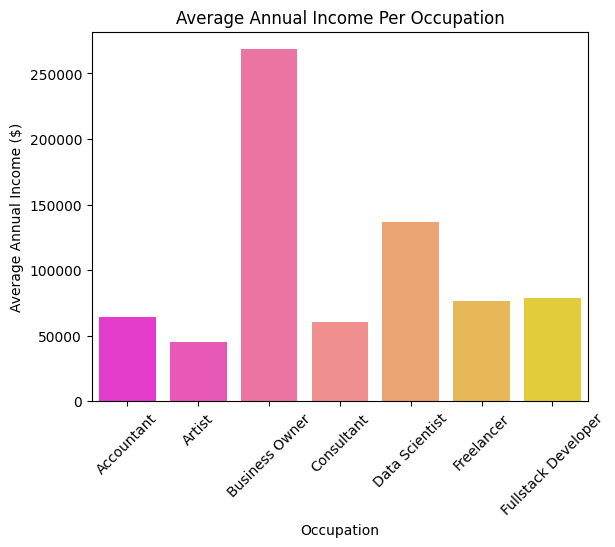

In [175]:
plt.Figure(figsize=(8,4))
sns.barplot(x=df_cust_occupation.index,
            y=df_cust_occupation.values,
            palette="spring")
plt.xticks(rotation=45)
plt.title('Average Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.show()

lets plot for remaining Columns with respect to annual income 

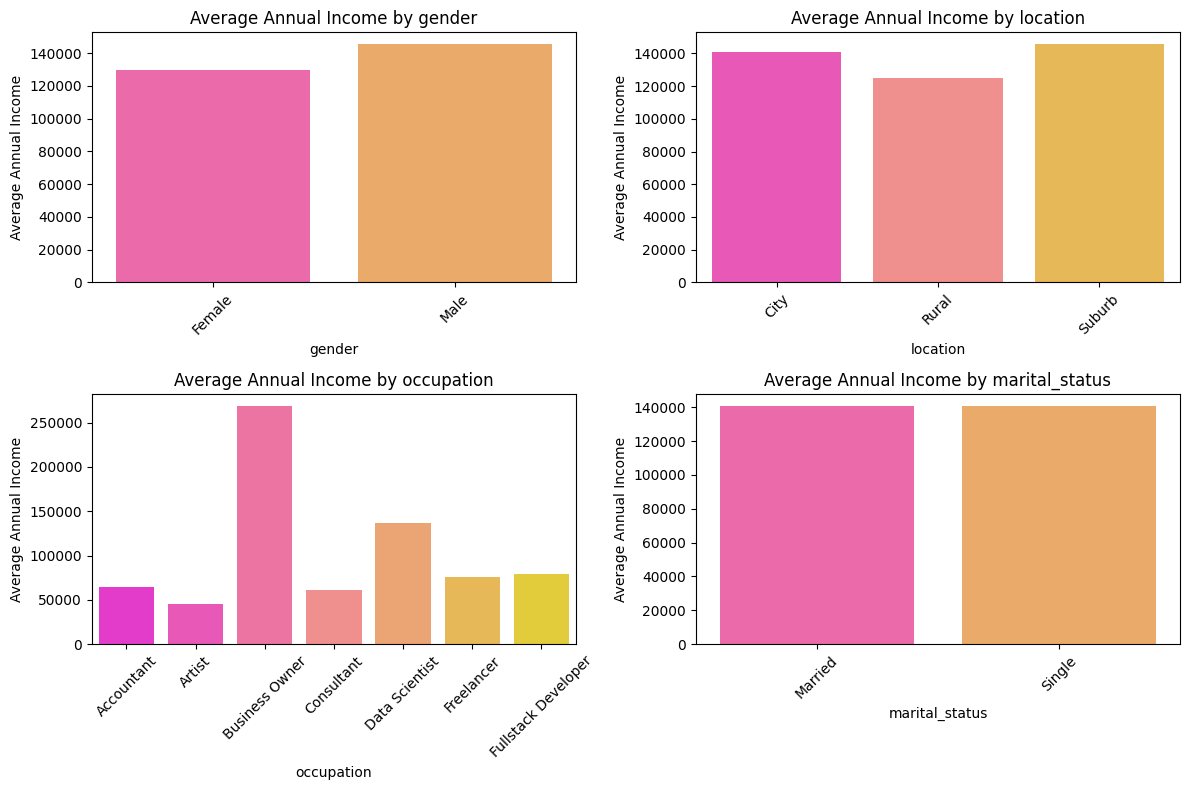

In [176]:
cat_cols = ['gender', 'location', 'occupation', 'marital_status']
n=2
fig,axes=plt.subplots(n,2, figsize=(12,4*n))
axes=axes.flatten()
for i,cat_col in enumerate(cat_cols):
    
    avg_income=df_customers.groupby(
        cat_col)["annual_income"].mean().reset_index()
    
    sns.barplot(x=cat_col,
                y="annual_income",
                data=avg_income,
                ax=axes[i],
                palette="spring")
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=45)
plt.tight_layout()
plt.show()

Data Cleaning :age

In [177]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


If we observe here, the minimum age is **1** and the maximum age is **135**

Let's understand more about it by plotting a histogram

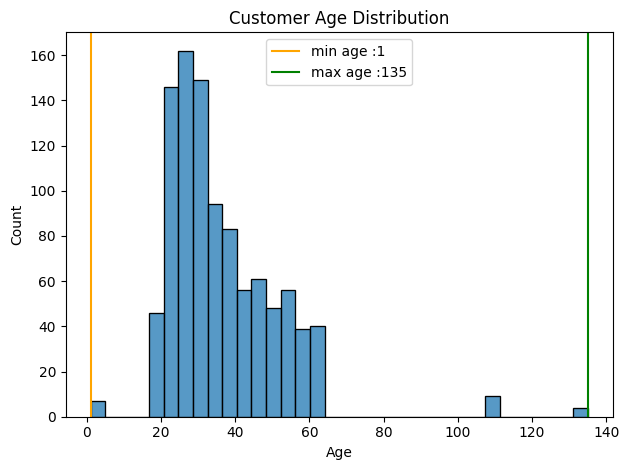

In [178]:
sns.histplot(df_customers.age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")
plt.axvline(df_customers.age.min(), 
            color="orange",
            label=f"min age :{df_customers.age.min()}")
plt.axvline(df_customers.age.max(), 
            color="green",
            label=f"max age :{df_customers.age.max()}")
plt.legend()
plt.tight_layout()
plt.show()

Here we can see some outliers!



let's consider age that is less than 15 and greather than 70 are as outliers 👍

In [179]:
df_customers[(df_customers.age<15)|(df_customers.age>70)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [180]:
outliers = df_customers[(df_customers.age<15)|(df_customers.age>80)]
outliers.shape

(20, 8)

Here total 20 rows of outliers are detected !

How can we able to handle them?

Possible options:
    
    1. Remove these rows: If we remove these rows we have a chance to lose the information!
    
    2. Replace them with appropriate value: mean or median

In [181]:
df_customers.age.median()

32.0

Let's see median age with respect to occupation 

In [182]:
median_per_occupation=df_customers.groupby(
    "occupation")['age'].median()
median_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

Let's replace them based on this median age

In [183]:
for index, row in outliers.iterrows():
    if pd.notnull(row['age']):
        occupation = df_customers.at[index, 'occupation']
        df_customers.at[index, 'age'] = median_per_occupation[occupation]

Let us check for the outliers once more!

In [184]:
df_customers[(df_customers.age<15)|(df_customers.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


Here we get empty data Hence, Outliers in age are treated!

Data Visualization of age 


In [185]:
df_customers["age_group"]=pd.cut(df_customers.age,bins=[17,25,48,65],
                                 labels=['18-25','26-48','49-65'])
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [186]:
age_group_counts=df_customers.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

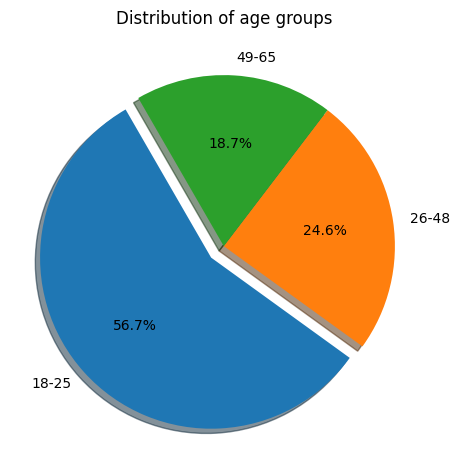

In [187]:
colours=sns.color_palette("tab10",7)
plt.pie(age_group_counts,
        labels=['18-25','26-48','49-65'],
        explode=(0.1,0,0),
        autopct='%1.1f%%',
        shadow=True,
        startangle=120,
        colors=colours)
plt.title("Distribution of age groups")
plt.tight_layout()
plt.show()

In [188]:
df_customers.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group'],
      dtype='object')

Analyzing Gender and Location 

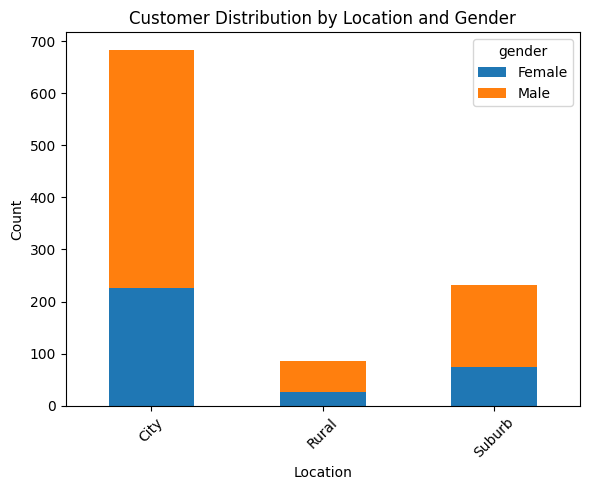

In [189]:
c_grp=df_customers.groupby(["location","gender"]).size().unstack()
c_grp.plot(kind="bar",stacked=True,figsize=(6,5))
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***
<h1 style="color:skyblue" align="center">Exploring Credit Score DataSet</h1>

***

In [190]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [191]:
df_credit.shape

(1004, 6)

In [192]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_id                         1004 non-null   int64  
 1   credit_score                    1004 non-null   int64  
 2   credit_utilisation              1000 non-null   float64
 3   outstanding_debt                1000 non-null   float64
 4   credit_inquiries_last_6_months  1000 non-null   float64
 5   credit_limit                    935 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.2 KB


In [193]:
df_credit.duplicated("cust_id").value_counts()

False    1000
True        4
Name: count, dtype: int64

Here , we can say that we have the 4 duplicate values/rows

In [194]:
df_credit[df_credit.duplicated('cust_id', keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [195]:
df_clean=df_credit.drop_duplicates(subset="cust_id",keep='last')
df_clean.head(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0


Here the duplicates in data are removed !

Let's Check for the  Null Values in the Dataset

In [196]:
df_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

Here, we found 65 NaN values in credit_limit  column

 From the business knowledge we know that credit limit depends on credit score of a customer. We will try to find out if we can figure out a mathematical relationship between credit score and credit limit and use credit score to full NULL values in credit limit. Let's explore a few things here!

In [197]:
df_clean[df_clean.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [198]:
df_clean.credit_limit.unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

There are only few unique values in the credit limot column

In [199]:
df_clean.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

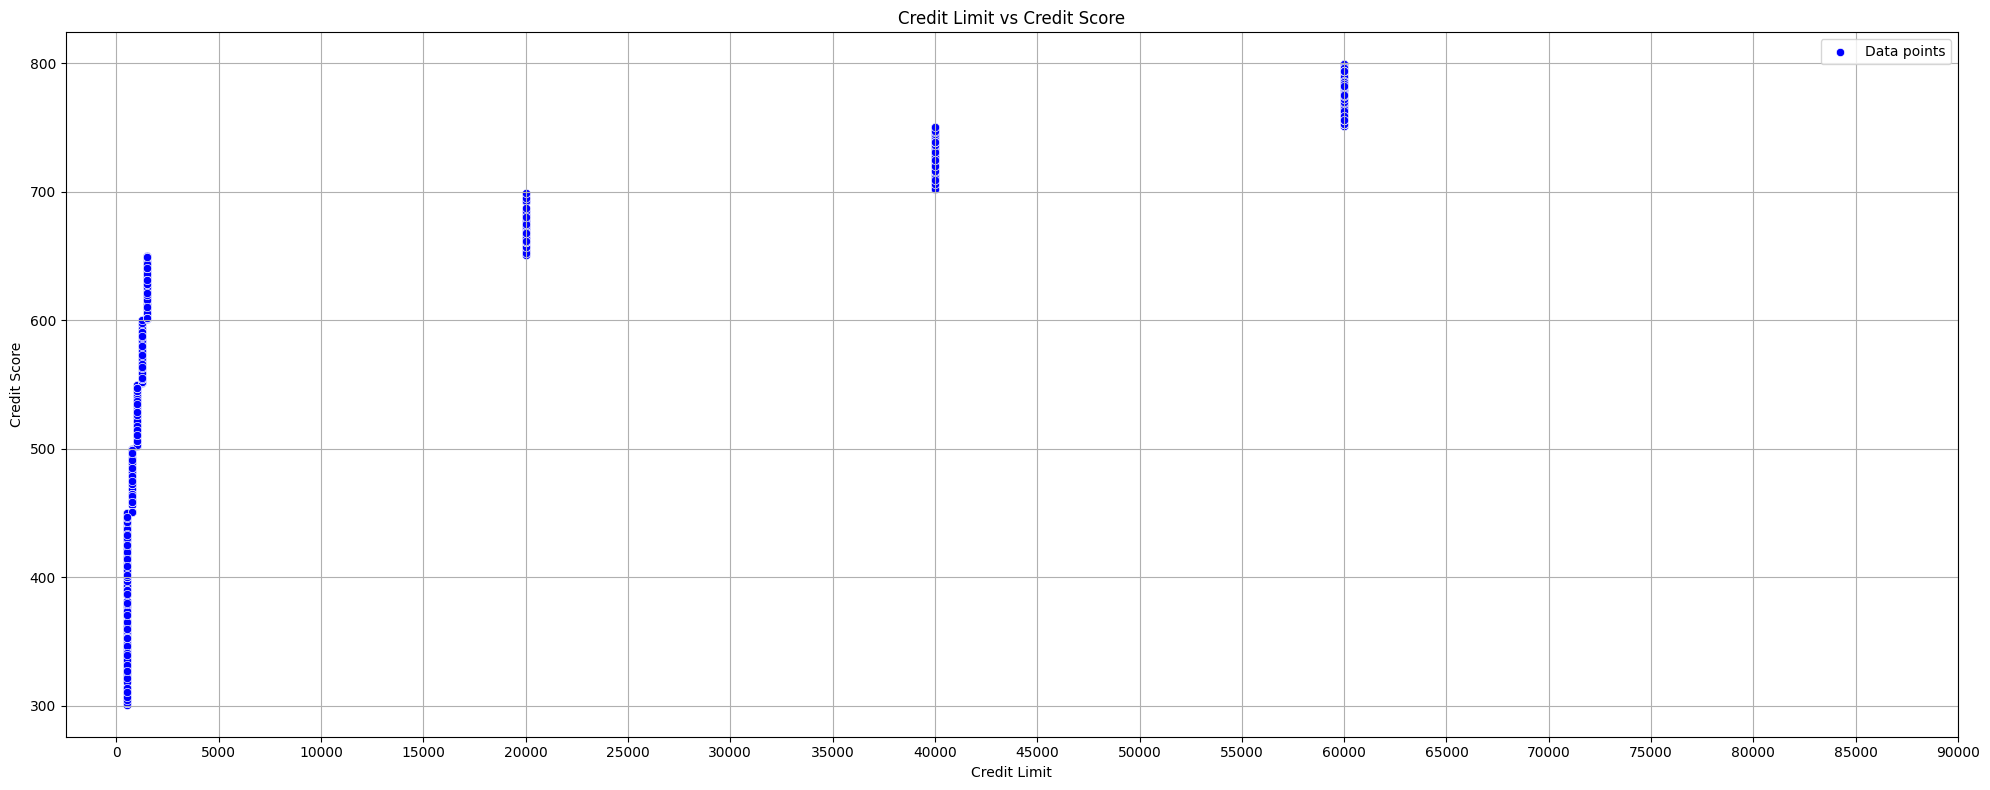

In [200]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='credit_limit',
                y='credit_score', 
                data=df_clean,
                label='Data points',
                palette='spring',
                markers='o',
                c='b')
plt.title('Credit Limit vs Credit Score')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.xticks(range(0, 90001, 5000))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Here we can see clear relationship between credit score and credit limit

In [201]:
# Define bin ranges
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' 
              for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_clean['credit_score_range'] = pd.cut(df_clean['credit_score'], 
                                        bins=bin_ranges, 
                                        labels=bin_labels, 
                                        include_lowest=True, 
                                        right=False)

In [202]:
df_clean

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [203]:
df_clean[df_clean.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,NaN,650-699
35,36,790,0.112535,4261.0,1.0,NaN,750-799
37,38,514,0.296971,238.0,2.0,NaN,500-549
45,46,761,0.596041,24234.0,2.0,NaN,750-799
64,65,734,0.473715,13631.0,0.0,NaN,700-749
...,...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN,450-499
931,928,311,0.832244,316.0,2.0,NaN,300-449
948,945,526,0.272734,227.0,1.0,NaN,500-549
954,951,513,0.175914,131.0,3.0,NaN,500-549


In [204]:
df_clean_1 = df_clean.copy()

def fill_with_mode(group):
    mode_val = group['credit_limit'].mode()
    if not mode_val.empty:
        group['credit_limit'] = group['credit_limit'].fillna(mode_val[0])
    return group


df_clean_1 = df_clean_1.groupby('credit_score_range').apply(fill_with_mode)

df_clean_1.reset_index(drop=True, inplace=True)

In [205]:
df_clean_1.credit_limit.unique()

array([  500.,   750.,  1000.,  1250.,  1500., 20000., 40000., 60000.])

In [206]:
df_clean_1.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

Hence we handled all null values in the credit_limit column

In [207]:
df_clean_1.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


On examining the minimum and maximum values of various columns, we notice that the maximum value of outstanding_debt exceeds that of credit_limit. However, based on business Understanding, a customer's debt should not surpass their credit limit, as spending beyond this limit isn't permitted. Let's identify how many such instances exist in the dataset.

Let's look these outliers with boxplot

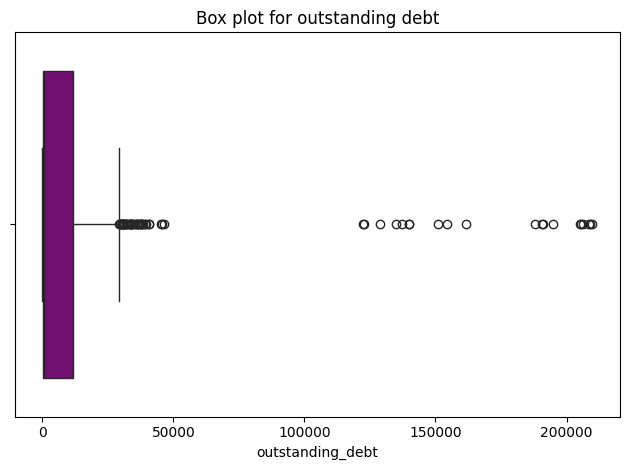

In [208]:
sns.boxplot(x=df_clean_1.outstanding_debt,
            color='purple')
plt.title('Box plot for outstanding debt')
plt.tight_layout()
plt.show()

As per our Business Knowledge, we should need to mark any thing which has outstanding debt exceeds the credit limit as outlier!

In [209]:
df_clean_1[df_clean_1.outstanding_debt>df_clean_1.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
46,205,303,0.364360,187849.0,0.0,500.0,300-449
89,351,320,0.285081,150860.0,0.0,500.0,300-449
157,637,420,0.323984,140063.0,4.0,500.0,300-449
287,647,498,0.658087,128818.0,3.0,750.0,450-499
292,724,465,0.658173,140008.0,3.0,750.0,450-499
298,767,473,0.611750,195004.0,1.0,750.0,450-499
414,2,587,0.107928,161644.0,2.0,1250.0,550-599
496,20,647,0.439132,205014.0,3.0,1500.0,600-649
571,731,626,0.762245,209901.0,2.0,1500.0,600-649
651,39,734,0.573023,122758.0,3.0,40000.0,700-749


In [210]:
df_clean_1[df_clean_1.outstanding_debt>df_clean_1.credit_limit].shape

(20, 7)

There are 20 outliers detected !

We will replace these outliers with the credit limit

In [211]:
df_clean_1.loc[df_clean_1["outstanding_debt"]>df_clean_1["credit_limit"],
                "outstanding_debt"]

46     187849.0
89     150860.0
157    140063.0
287    128818.0
292    140008.0
298    195004.0
414    161644.0
496    205014.0
571    209901.0
651    122758.0
657    137058.0
680    154568.0
686    122402.0
746    205404.0
788    190838.0
858    208898.0
877    206191.0
903    135112.0
930    190717.0
968    208406.0
Name: outstanding_debt, dtype: float64

In [212]:
df_clean_1.loc[df_clean_1["outstanding_debt"]>df_clean_1["credit_limit"],
               "outstanding_debt"]=df_clean_1.loc[
                   df_clean_1["outstanding_debt"]>df_clean_1["credit_limit"],
                   "credit_limit"]

In [213]:
df_clean_1.loc[df_clean_1[
    "outstanding_debt"]>df_clean_1["credit_limit"],"outstanding_debt"]

Series([], Name: outstanding_debt, dtype: float64)

Hence all the outliers are treated!

<h3>Visualizing Correlation in the Credit Score Table

In [214]:
df_clean_1.head(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,6,442,0.705409,246.0,4.0,500.0,300-449
1,12,429,0.627645,263.0,0.0,500.0,300-449
2,16,347,0.531660,190.0,0.0,500.0,300-449
3,19,447,0.795650,292.0,1.0,500.0,300-449
4,21,381,0.714710,307.0,0.0,500.0,300-449


In [215]:
df_customers.head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


Let's merge these two DataFrames for better outcomes


In [216]:
df_merge=df_customers.merge(df_clean_1 , on="cust_id", how="inner")

In [217]:
df_merge.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749


In [218]:
df_merge.shape

(1000, 15)

In [219]:
correlation_matrix=df_merge[["age",
                             "annual_income",
                             "credit_score",
                             "credit_utilisation",
                             "outstanding_debt",
                             "credit_limit"]].corr()
correlation_matrix

,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_limit
age,1.000000,0.619037,0.444917,-0.027713,0.444301,0.510993
annual_income,0.619037,1.000000,0.575751,-0.086368,0.555661,0.684775
credit_score,0.444917,0.575751,1.000000,-0.070445,0.680654,0.847952
credit_utilisation,-0.027713,-0.086368,-0.070445,1.000000,0.192838,-0.080493
outstanding_debt,0.444301,0.555661,0.680654,0.192838,1.000000,0.810581
credit_limit,0.510993,0.684775,0.847952,-0.080493,0.810581,1.000000


Let's Create the Heatmap for better understanding

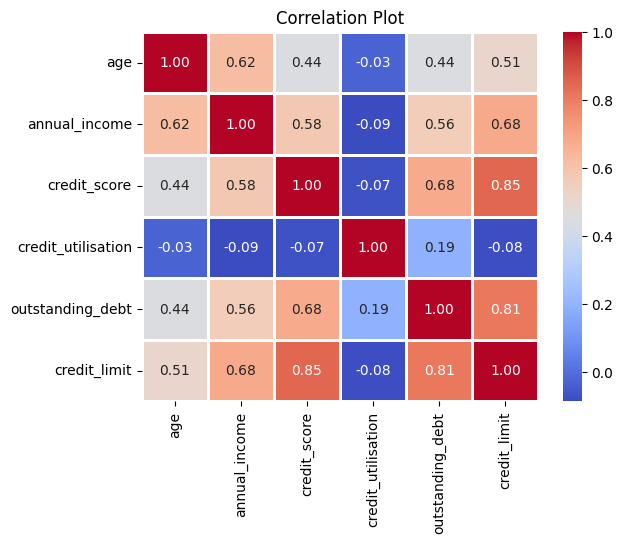

In [220]:
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f", 
            cmap="coolwarm",
            linewidth=0.8)
plt.title("Correlation Plot")
plt.show()

* There Exists a high correlation between credit limit and credit score(~0.85)

* Credit Limit and annual income has high correlation

***
<h1 style="color:skyblue" align="center">Exploring Transactions DataSet</h1>

***

In [221]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [222]:
df_transactions.shape

(500000, 7)

In [223]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

Here, Platform has 4941 null values

Let's Explore and fix them!

In [224]:
df_transactions[df_transactions.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


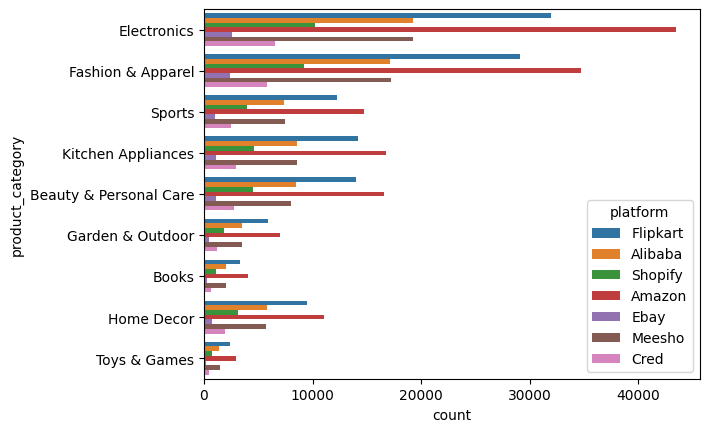

In [225]:
sns.countplot(y='product_category',
              hue="platform",
              data = df_transactions, 
              palette="tab10")
plt.show()

In the above count plot, we can say that the Amazon is the most used platform for the every product delivery!

So,By using our Business Understanding, we can replace the NaN values with the mode of the platform column 

In [226]:
df_transactions.platform.mode()[0]

'Amazon'

In [227]:
df_transactions["platform"].fillna(
    df_transactions.platform.mode()[0],
    inplace=True)

In [228]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [229]:
df_transactions.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

All the Null values are treated!

In [230]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


Here, we can see the transaction amount as 0.00 which is invalid!

In [231]:
df_outlier=df_transactions[df_transactions.tran_amount==0]
df_outlier[["platform",
            "product_category",
            "payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

If we observe it carefully, all the columns with transaction amount as 0 has the platform as Amazon , Product category as Electronics , Payment type as credit card.

Let's see the other values which has the similar properties in the dataframe 

In [232]:
df_trans_filter=df_transactions[
    (df_transactions.platform=="Amazon") & 
    (df_transactions.product_category=="Electronics") & 
    (df_transactions.payment_type=="Credit Card")]
df_trans_filter

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [233]:
df_trans_filter.shape

(15637, 7)

We found 15637 records with the similar Properties!

As per Business knowledge, we will find the median by excluding outliers for it to replace 

In [234]:
m=df_trans_filter[df_trans_filter.tran_amount>0].tran_amount.median()
m

554.0

In [235]:
df_transactions.replace(0,m,inplace=True)

In [236]:
df_transactions[df_transactions.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


Hence we get rid off the zero values in transaction amount 

In [237]:
df_transactions.tran_amount.describe()

count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

In [238]:
df_transactions[df_transactions['tran_amount']<1000].describe()

,tran_id,cust_id,tran_amount
count,475000.000000,475000.000000,475000.000000
mean,250041.699922,501.375499,240.667608
std,144285.259913,288.606185,244.487110
min,1.000000,1.000000,2.000000
25%,125126.750000,252.000000,63.000000
50%,250100.500000,502.000000,131.000000
75%,374928.250000,751.000000,348.000000
max,500000.000000,1000.000000,999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

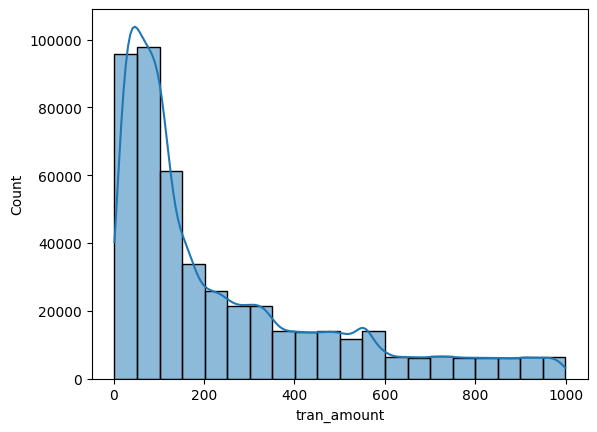

In [239]:
sns.histplot(x='tran_amount', 
             data=df_transactions[df_transactions['tran_amount']<1000],
               bins=20, 
               kde=True)

In [240]:
Q1,Q3=df_transactions["tran_amount"].quantile([0.25,0.75])
IQR=Q3-Q1
lower=Q1-2*IQR
upper=Q3+2*IQR

lower,upper

(-628.0, 1107.0)

If we observe the lower and upper limit, lower limit<0 hence, we can neglet lower limit !

In [241]:
df_transactions[df_transactions.tran_amount<upper].tran_amount.max()

999

In [242]:
df_transactions[df_transactions.tran_amount>=upper].tran_amount.max()

69999

In [243]:
df_trans_outliers=df_transactions[df_transactions.tran_amount>=upper]
df_trans_outliers.head(5)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [244]:
df_trans_normal=df_transactions[df_transactions.tran_amount<upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [245]:
tran_mean_per_category = df_trans_normal.groupby(
            "product_category")["tran_amount"].mean()

tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [246]:
df_transactions.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [247]:
df_transactions.loc[df_trans_outliers.index,  
                    'tran_amount']=df_trans_outliers[
                        'product_category'].map(
                            tran_mean_per_category)


In [248]:
df_transactions.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


Now we came to know that we get rid off from outliers!

<h2 style="color:#33cc33"> Data Visualization  </h2>


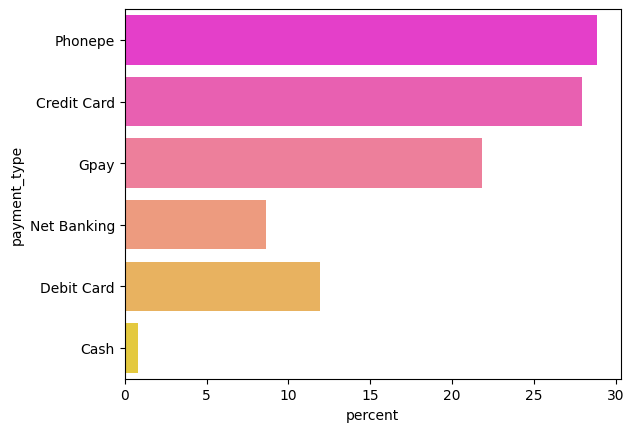

In [249]:
sns.countplot(df_transactions.payment_type,
              stat="percent",
              palette="spring")
plt.show()

In [250]:
df_merge_final=df_merge.merge(df_transactions,
                              on="cust_id",
                              how = "inner")
df_merge_final.head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [251]:
df_merge_final.shape

(500000, 21)

In [252]:
df_merge_final.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group', 'credit_score',
       'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_score_range',
       'tran_id', 'tran_date', 'tran_amount', 'platform', 'product_category',
       'payment_type'],
      dtype='object')

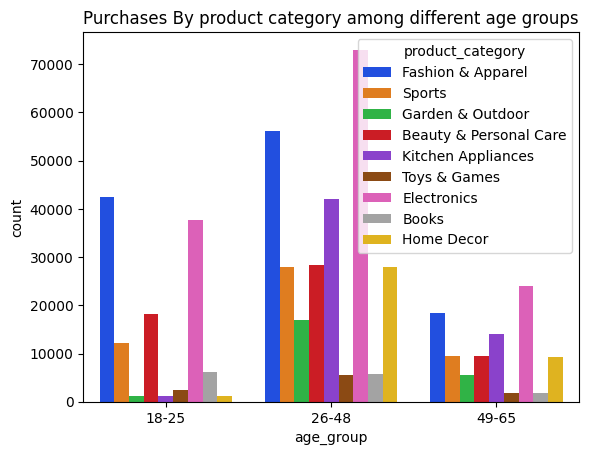

In [253]:
sns.countplot(x=df_merge_final.age_group,
               hue=df_merge_final.product_category,
               palette="bright")
plt.title("Purchases By product category among different age groups")
plt.show()

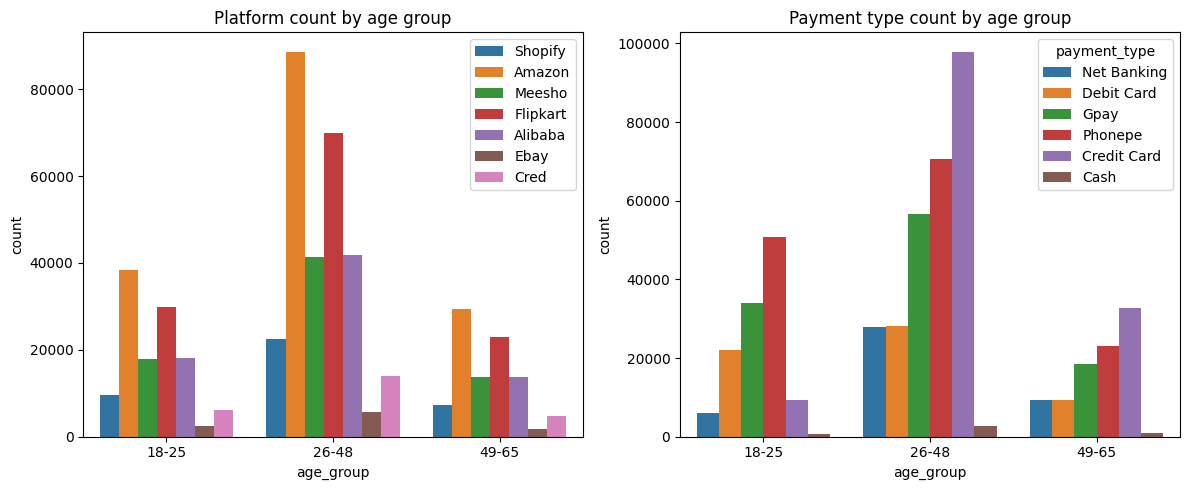

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df_merge_final.age_group,
               hue=df_merge_final.platform,
                 data=df_merge_final, 
                 ax=axes[0])
axes[0].set_title("Platform count by age group")
axes[0].legend(loc="upper right")

sns.countplot(x=df_merge_final.age_group, 
              hue=df_merge_final.payment_type,
                data=df_merge_final, 
                ax=axes[1])
axes[1].set_title("Payment type count by age group")

plt.tight_layout()
plt.show()

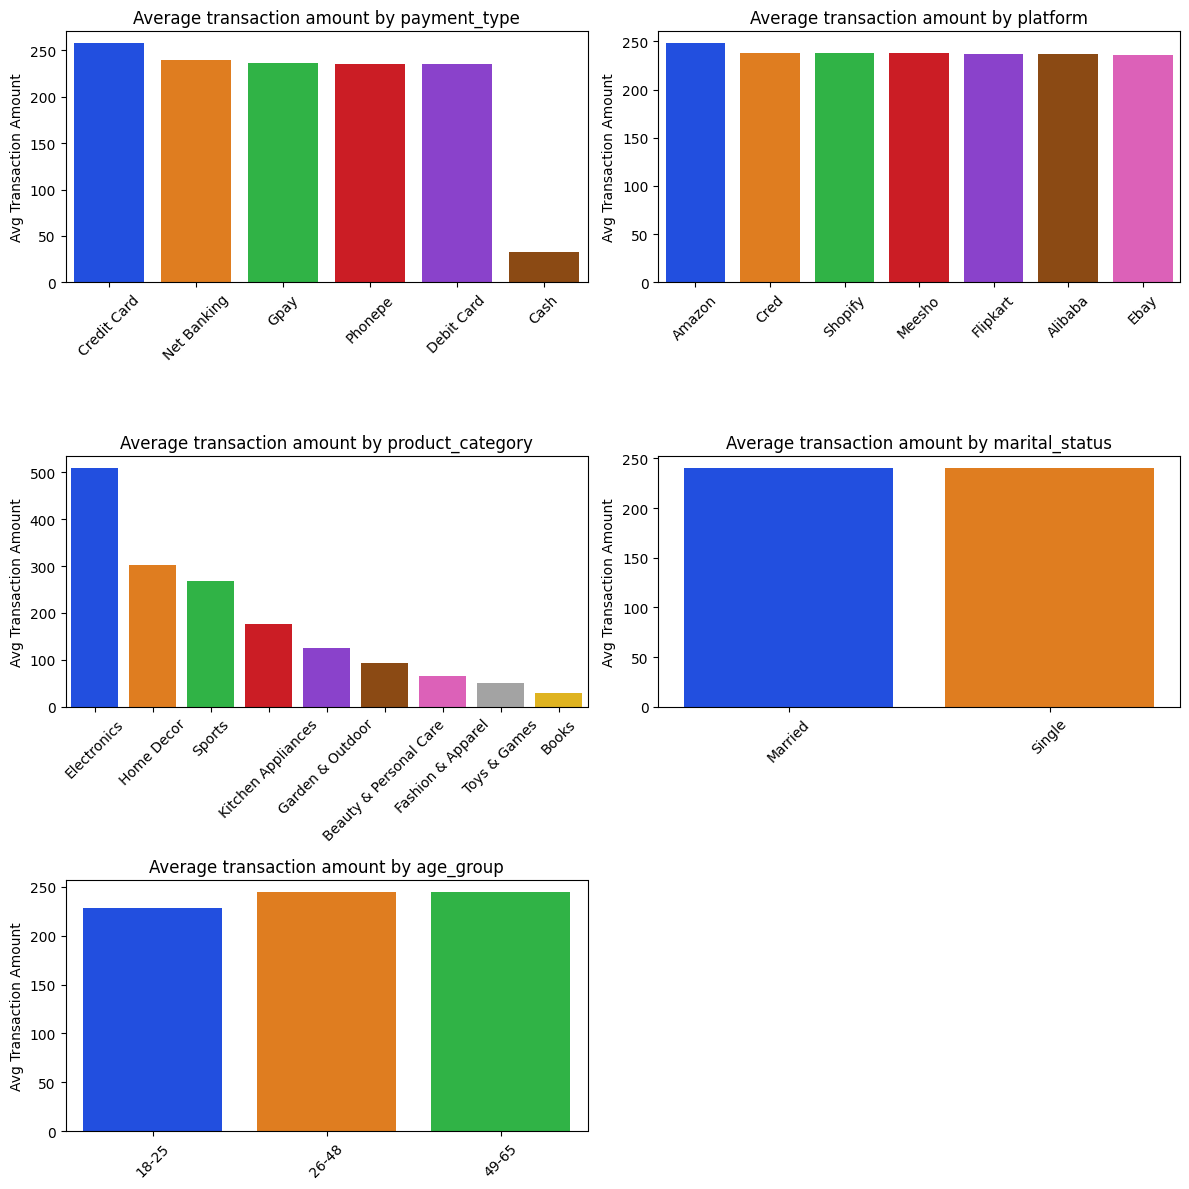

In [255]:
cat_cols = [
    'payment_type',
      'platform', 
      'product_category', 
      'marital_status', 
      'age_group']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols):

    data = df_merge_final.groupby(
        col)['tran_amount'].mean().sort_values(
            ascending=False).reset_index()
    
    sns.barplot(x=col, y='tran_amount', 
                data=data, 
                ax=axes[i],
                palette='bright')
    axes[i].set_title(f'Average transaction amount by {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Avg Transaction Amount')
    axes[i].tick_params(axis='x', rotation=45)

for ax in axes[len(cat_cols):]:
    ax.remove()
plt.tight_layout()
plt.show()

In [256]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merge.groupby('age_group')[[
    'annual_income', 
    'credit_limit', 
    'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


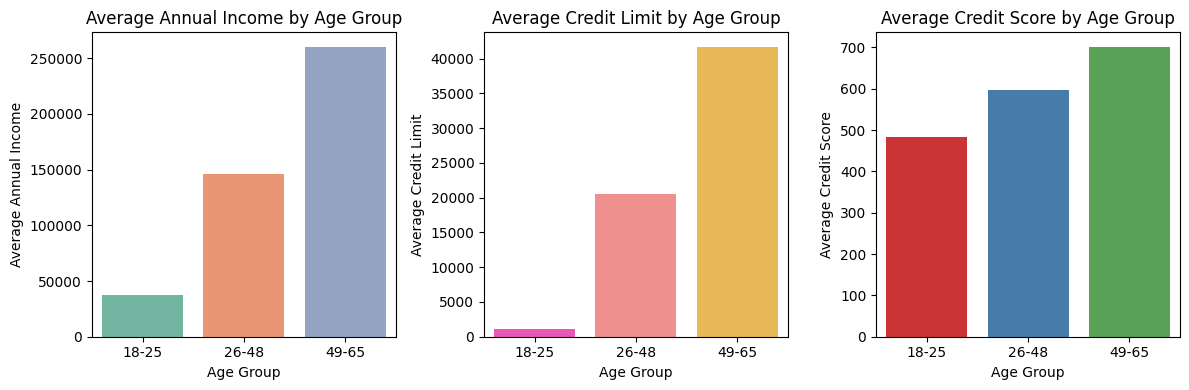

In [257]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Define plot configurations
plots = [
    (
        'annual_income',
        'Average Annual Income', 
        'Set2'
    ),
    (
        'credit_limit', 
        'Average Credit Limit',
        'spring'
    ),
    (
        'credit_score',
        'Average Credit Score',
        'Set1'
    )
]

# Generate plots in a loop
for ax, (y_col, title, palette) in zip(axes, plots):
    sns.barplot(x='age_group',
                y=y_col,
                data=age_group_metrics,
                palette=palette, 
                ax=ax)
    ax.set_title(f'{title} by Age Group')
    ax.set_xlabel('Age Group')
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


***
<h1 style="color:#33cc33" align="center"> Insights From Data</h1>

***

* Males have a slightly higher average income than females.

* Customers living in city and suburban areas earn noticeably more than those in rural regions.


* Business Owners lead significantly in average income, followed by Data Scientists. Occupations such as full stack developers, freelancers, consultants, and accountants fall in the middle income range, while artists represent the lowest average earners in the dataset.


* Married and single customers have similar income levels, suggesting marital status has little to no impact on average earnings in this dataset.

* More than 50% of customer base are in in age group of 26 - 48 and nearly 25% are of age group 18 - 25

* Most of the customers are from the city where as Least from Rural area

* Phonepe is most used payment method and Credit card is second most used payment method!

* Top 3 Product categories among age group(18-25): Electronics, Fashion & Apparel, Beauty & personal care

* Top 3 Product categories among age group(26-48): Electronics, Fashion & Apparel, Kitchen Appliances

* Top  platforms are Amazon, Flipkart, Alibaba and Meesho

* age group 18-25 has less exposure to credit cards compared to other groups

* Credit Card users have the highest average transaction amount, followed by Net Banking and UPI (GPay, PhonePe)

* Cash transactions have the lowest average, indicating they are used for smaller purchases.



* High-value users prefer digital payments like Credit Cards and Net Banking.



* Electronics dominates with the highest average transaction amount, followed by Home Decor and Sports.

* Categories like Books, Toys & Games, Fashion, and Beauty show much lower averages, likely due to lower individual item cost.

* Single users have a slightly higher average transaction amount than Married users.

***
<h2 align="center", style="color:RED">Finalize Target Market For a Trial Credit Card Launch<h2>

***

1. Individuals in the 18–25 age group make up approximately 26% of the total customer base.

2. The average annual income for this group is below ₹50,000.

3. Their limited credit history is evident in both their lower credit scores and reduced credit limits.

4. Credit card usage is relatively less common among this age group compared to others.

5. The top three product categories they shop for are Electronics, Fashion & Apparel, and Beauty & Personal Care.

<h2> </h2>

<h2> </h2>

*** 
<h2 align="center" style="color:purple">Phase 2: AtliQ0 Bank Credit Card Project</h2>

*** 

<h2> </h2>

### Business Analysis and launch of AB testing: Targeting Untapped Market


### Insights specific to customers with age group of 18 - 25
1. Individuals in the 18–25 age group make up approximately 26% of the total customer base.

2. The average annual income for this group is below ₹50,000.

3. Their limited credit history is evident in both their lower credit scores and reduced credit limits.

4. Credit card usage is relatively less common among this age group compared to others.

5. The top three product categories they shop for are Electronics, Fashion & Apparel, and Beauty & Personal Care.

#### Defining Null and Alternate hypothesis

* Null Hypothesis (H₀): There is no difference in the average transaction amounts between the control group and the test group.

* Alternative Hypothesis (Hₐ): There is a difference in the average transaction amounts between the control group and the test group.





***

<h3 style="color:DarkRed" align="center">Pre-Campaign</h3>

***

We want to do a test run for our new credit card. To do this, we need to find out how many customers we need for A/B testing. We will split the customers into two groups: a control group and a test group. The number of customers in each group will be decided based on the statistical power and effect size, which we will decide after talking with the business team.

In [258]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats as st

In [259]:
alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.40569300025135

For an effect size of 2, we need 393 customers. Since we have budget limits for this campaign, let’s try different effect sizes and talk with the business team to decide which sample size works best.

In [260]:
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(
        effect_size=effect_size, 
        alpha=alpha, 
        power=power, 
        ratio=1, 
        alternative='two-sided'
        )
    
    print(f"Effect Size: {effect_size},Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1,Required Sample Size: 1570 customers
Effect Size: 0.2,Required Sample Size: 393 customers
Effect Size: 0.3,Required Sample Size: 175 customers
Effect Size: 0.4,Required Sample Size: 99 customers
Effect Size: 0.5,Required Sample Size: 63 customers
Effect Size: 1,Required Sample Size: 16 customers


The business wants the test to find a small difference of 0.4 between the two groups. To do this, we need 100 customers. The business said 100 customers is okay for their budget for this test.


### Creating Test and Control Groups


We found about 246 customers aged 18 to 25. From these, we picked 100 people to take part in the first campaign.

The campaign was run with these 100 customers, keeping in mind the effect size and budget, and it lasted for two months.

After the campaign, about 40 out of the 100 customers started using the credit card. This means the conversion rate was 40%.

To keep things fair, we also chose a control group of 40 customers who were not part of the campaign group.

So now, both the test group and the control group have 40 customers each.

##### After the 2-month campaign (from 09-10-23 to 11-10-23), we collected daily data showing the average transaction amounts made by the 40 customers in both the control group and the test group. The control group used the existing credit cards, and the test group used the new credit card.

#####  The main goal of this A/B test is to increase the average transaction amount using the new card.



***

<h3 style="color:DarkRed" align="center">Post-Campaign</h3>

***


In [261]:
df_phase2=pd.read_csv("avg_transactions_after_campaign.csv")
df_phase2.head(5)

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,251.02,401.78
1,2023-09-11,250.77,326.16
2,2023-09-12,248.81,303.92
3,2023-09-13,255.90,363.29
4,2023-09-14,255.86,317.06


In [262]:
df_phase2.shape

(62, 3)

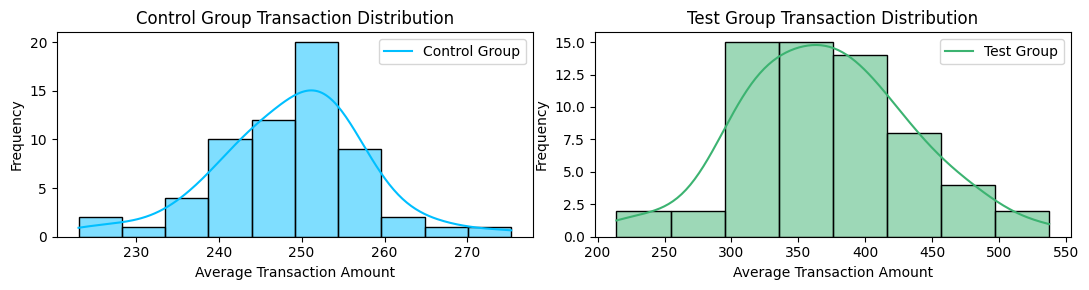

In [263]:
# Let's visualize the average transaction distributions for control and test groups
fig = plt.figure(figsize=(11, 3))

# Subplot 1: Control Group
plt.subplot(1, 2, 1)
sns.histplot(df_phase2['control_group_avg_tran'], 
             kde=True, 
             color='deepskyblue')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Frequency')
plt.title('Control Group Transaction Distribution')
plt.legend(['Control Group'])

# Subplot 2: Test Group
plt.subplot(1, 2, 2)
sns.histplot(df_phase2['test_group_avg_tran'], 
             kde=True, 
             color='mediumseagreen')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Frequency')
plt.title('Test Group Transaction Distribution')
plt.legend(['Test Group'])

# Final display
plt.tight_layout()
plt.show()


##### Perform Hypothesis Testing Using Two Sample Z-test

In [264]:
control_mean = df_phase2["control_group_avg_tran"].mean()
control_std = df_phase2["control_group_avg_tran"].std()
control_mean, control_std

(248.94129032258064, 9.137869049553624)

In [265]:
test_mean = df_phase2["test_group_avg_tran"].mean()
test_std = df_phase2["test_group_avg_tran"].std()
test_mean, test_std

(370.5364516129033, 63.25415113953286)

In [266]:
sample_size = df_phase2.shape[0]
sample_size

62

### Test Using Rejection Region (i.e. Critical Z Value)

In [267]:
a = (control_std**2/sample_size)
b = (test_std**2/sample_size)

Z_score = (test_mean-control_mean)/np.sqrt(a+b)
Z_score

14.98090307099052

### Test Using Rejection Region (i.e. Critical Z Value)

In [268]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

1.6448536269514722

In [269]:
if Z_score > critical_z_value:
    print("Reject the Null Hypothesis !")
else:
    print("Accept the Null Hypothesis !")

Reject the Null Hypothesis !


Since Z score is higher than critical Z value, we can reject the null hypothesis.


***
<h1 style="color:#33cc33" align="center">📌 Conclusion (Based on Hypothesis Testing) </h1>

***
In this right-tailed Z-test, the calculated Z score was found to be greater than the critical Z value of 1.645 at a 5% significance level.

As a result, we **reject the null hypothesis (H₀)** and conclude that there is a **statistically significant difference** in the average transaction amounts between the test and control groups.

This suggests that the marketing campaign had a **positive impact** on customer behavior, leading to increased usage of credit cards.
